<h1>e-shop clothing 2008: Dataframe overview</h1>

<h2>Ch 1: Load libraries and dataset</h2>

<h3>Load commonly-used libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style('whitegrid')

In [2]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

<h3>Load source csv file</h3>

In [3]:
df = pd.read_csv('e-shop clothing 2008.csv', sep = ';')

In [4]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [5]:
len(df.columns)

14

In [6]:
len(df)

165474

<h2>Ch 2: First look on variables</h2>

In [7]:
df['year'].value_counts()

2008    165474
Name: year, dtype: int64

<h4>Comment: Apparently all observations take place in 2008. We may drop this column if necessary</h4>

In [8]:
df['month'].value_counts()

4    48199
5    35654
7    35231
6    32242
8    14148
Name: month, dtype: int64

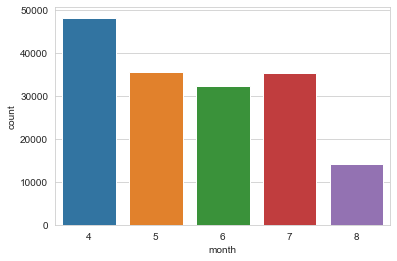

In [9]:
sb.countplot(df['month'])

<h4>Comment: April has the highest number of transactions, and August has the lowest</h4>

In [10]:
df['country'].value_counts().head()

29    133963
9      18003
24      4091
46      2522
44      1385
Name: country, dtype: int64

<h4>Comment: Top 3 countries by number of transactions:
        Poland,
        Czech Republic,
        Lithuania</h4>

In [11]:
df.groupby('month').agg({'price':'sum'})

,price
month,
4,2100924
5,1562573
6,1411981
7,1547518
8,625180


<h2>Ch 3. Data cleaning</h2>

The dataset is found on UCI Machine Learning Repository. You can find the original dataset and readme file on 

Credit: £apczyÒski M., Bia≥owπs S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
ìStudia Ekonomiczneî, nr 151, ìLa sociÈtÈ de l'information : perspective europÈenne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateursî, p. 144-
153.

<h3>Build a dictionary and replace the country code with country name</h3>

In [12]:
dictCountry = {1 : 'Australia', 2 : 'Austria', 3 : 'Belgium', 4 : 'British Virgin Islands', 5 : 'Cayman Islands',
              6 : 'Christmas Island', 7 : 'Croatia', 8 : 'Cyprus', 9 : 'Czech Republic', 10 : 'Denmark',
              11 : 'Estonia', 12 : 'unidentified', 13 : 'Faroe Islands', 14 : 'Finland', 15 : 'France',
              16 : 'Germany', 17 : 'Greece', 18 : 'Hungary', 19 : 'Iceland', 20 : 'India',
              21 : 'Ireland', 22 : 'Italy', 23 : 'Latvia', 24 : 'Lithuania', 25 : 'Luxembourg',
              26 : 'Mexico', 27 : 'Netherlands', 28 : 'Norway', 29 : 'Poland', 30 : 'Portugal',
              31 : 'Romania', 32 : 'Russia', 33 : 'San Marino', 34 : 'Slovakia', 35 : 'Slovenia',
              36 : 'Spain', 37 : 'Sweden', 38 : 'Switzerland', 39 : 'Ukraine', 40 : 'United Arab Emirates',
              41 : 'United Kingdom', 42 : 'USA', 43 : 'biz (*.biz)', 44 : 'com (*.com)', 45 : 'int (*.int)',
              46 : 'net (*.net)', 47 : 'org (*.org)'}
df['country'].replace(dictCountry, inplace = True)

In [13]:
sorted(df['country'].unique())

['Australia',
 'Austria',
 'Belgium',
 'British Virgin Islands',
 'Cayman Islands',
 'Christmas Island',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'India',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'biz (*.biz)',
 'com (*.com)',
 'int (*.int)',
 'net (*.net)',
 'org (*.org)',
 'unidentified']

<h3>Build a dictionary to replace main product code with category name</h3>

In [14]:
dictPage1 = {1 : 'trousers', 2 : 'skirts', 3 : 'blouses', 4 : 'sale'}
df['page 1 (main category)'].replace(dictPage1, inplace = True)

<h3>Build a dictionary to replace colour code with colour name</h3>

In [15]:
dictColour = {1 : 'beige', 2 : 'black', 3 : 'blue', 4 : 'brown', 5 : 'burgundy',
              6 : 'gray', 7 : 'green', 8 : 'navy blue', 9 : 'of many colors', 10 : 'olive',
              11 : 'pink', 12 : 'red', 13 : 'violet', 14 : 'white'}
df['colour'].replace(dictColour, inplace = True)

<h3>Build a dictionary to replace location code with cardinal direction</h3>

In [16]:
dictLocation = {1 : 'top left', 2 : 'top in the middle', 3 : 'top right',
                4 : 'bottom left', 5 : 'bottom in the middle', 6 : 'bottom right'}
df['location'].replace(dictLocation, inplace = True)

<h3>Build a dictionary to replace model photography code with human language</h3>

In [17]:
dictModel = {1 : 'en face', 2 : 'profile'}
df['model photography'].replace(dictModel, inplace = True)

<h3>Save cleaned data frame to a new csv file</h3>

In [18]:
df.to_csv('eShop2008Cleaned.csv')

<h2>Ch 4. Overview on Variables</h2>

In [27]:
pd.unique(df['order'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [23]:
df['page 2 (clothing model)'].value_counts().head()

B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
Name: page 2 (clothing model), dtype: int64

<h4>Comment: It seems that we can run an association analysis commonly used by brick-and-mortar retailers</h4>

In [33]:
df['order'].value_counts().head()

1    24026
2    18984
3    15664
4    13044
5    11007
Name: order, dtype: int64

In [34]:
df['session ID'].nunique()

24026

<h4>Comment: There are 24026 orders in this dataset. You will see groupby('session ID') quite often</h4>

In [36]:
df['page 1 (main category)'].value_counts()

trousers    49742
sale        38747
blouses     38577
skirts      38408
Name: page 1 (main category), dtype: int64

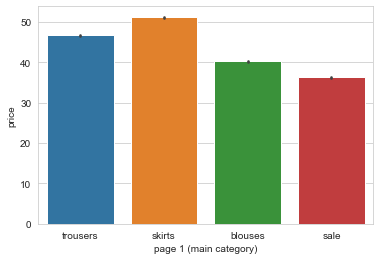

In [37]:
sb.barplot(x = "page 1 (main category)", y = "price", data = df)

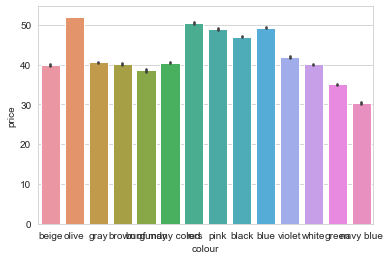

In [40]:
sb.barplot(x = "colour", y = "price", data = df)

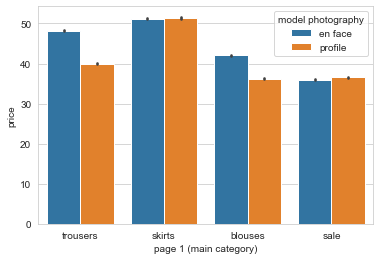

In [41]:
sb.barplot(x = "page 1 (main category)", y = "price", hue = 'model photography', data = df)

In [43]:
df['page 2 (clothing model)'].value_counts().tail(10)

P64    147
P24    135
P68    106
P32     98
P31     76
P66     46
P79      2
P22      2
P28      1
P54      1
Name: page 2 (clothing model), dtype: int64

In [45]:
df[df['page 2 (clothing model)'] == 'P66']

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
205,2008,4,1,14,Poland,33,sale,P66,of many colors,bottom left,profile,43,1,4
2254,2008,4,1,21,Poland,321,sale,P66,of many colors,bottom left,profile,43,1,4
5515,2008,4,2,18,Poland,815,sale,P66,of many colors,bottom left,profile,43,1,4
5972,2008,4,2,20,Poland,877,sale,P66,of many colors,bottom left,profile,43,1,4
8026,2008,4,3,7,Poland,1165,sale,P66,of many colors,bottom left,profile,43,1,4
9219,2008,4,4,16,Poland,1339,sale,P66,of many colors,bottom left,profile,43,1,4
11658,2008,4,5,14,Poland,1680,sale,P66,of many colors,bottom left,profile,43,1,4
20069,2008,4,11,43,Poland,2913,sale,P66,of many colors,bottom left,profile,43,1,4
20478,2008,4,11,16,Poland,2975,sale,P66,of many colors,bottom left,profile,43,1,4
23538,2008,4,13,14,Poland,3416,sale,P66,of many colors,bottom left,profile,43,1,4


<h4>I print out all rows where the clothing model is P66 to prove that you can treat clothing model as the "product ID".
In addition, some orders may contain the same item more than once (look at rows 45576 and 45605).</h4>

In [46]:
df['page 2 (clothing model)'].nunique()

217

In [48]:
df['page 2 (clothing model)'].unique()

array(['A13', 'A16', 'B4', 'B17', 'B8', 'C56', 'C57', 'P67', 'P82', 'B31',
       'B21', 'B24', 'B27', 'A10', 'P1', 'P34', 'P33', 'C4', 'C7', 'C10',
       'C17', 'P77', 'A34', 'A37', 'C25', 'C21', 'C15', 'C53', 'B26',
       'A11', 'C5', 'P60', 'P56', 'P55', 'P48', 'P50', 'P42', 'P23',
       'C49', 'B23', 'C19', 'C34', 'C40', 'C50', 'C42', 'A18', 'A1', 'B1',
       'B16', 'A3', 'B3', 'B30', 'P16', 'A2', 'A5', 'A41', 'B2', 'B13',
       'B15', 'B9', 'B20', 'B25', 'B33', 'B34', 'C2', 'C33', 'C35', 'C55',
       'C59', 'P61', 'P62', 'A6', 'C47', 'B32', 'A17', 'A7', 'A8', 'A9',
       'A20', 'A32', 'C11', 'C22', 'P12', 'A4', 'A23', 'B12', 'B10',
       'C14', 'A12', 'A31', 'A15', 'B7', 'C8', 'C18', 'P2', 'P10', 'C26',
       'C31', 'A35', 'A36', 'C46', 'P29', 'A21', 'P63', 'P30', 'P32',
       'P66', 'P57', 'P43', 'P4', 'A28', 'B28', 'P15', 'A19', 'B19',
       'B14', 'B6', 'A29', 'P49', 'C3', 'C9', 'C36', 'C37', 'C39', 'C51',
       'C52', 'A42', 'B29', 'B11', 'P6', 'P17', 'P11', 'C1', 

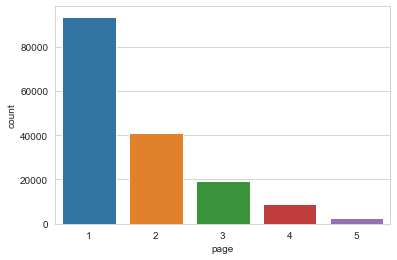

In [49]:
sb.countplot('page')

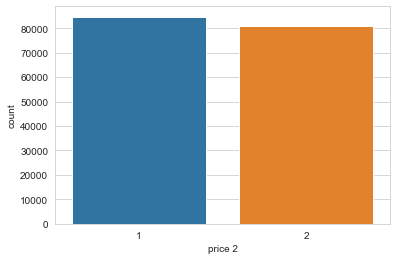

In [50]:
sb.countplot(df['price 2'])

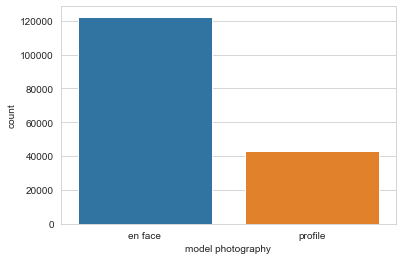

In [52]:
sb.countplot(df['model photography'])

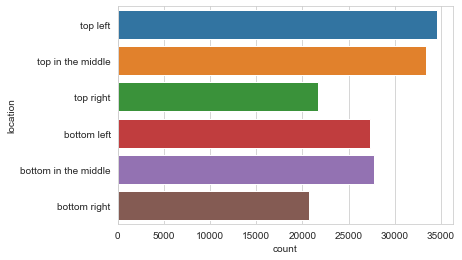

In [55]:
listLocation = ['top left', 'top in the middle', 'top right', 'bottom left', 'bottom in the middle', 'bottom right']
sb.countplot(y = df['location'], order = listLocation)

In [62]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,Poland,1,trousers,A13,beige,bottom in the middle,en face,28,2,1
1,2008,4,1,2,Poland,1,trousers,A16,beige,bottom right,en face,33,2,1
2,2008,4,1,3,Poland,1,skirts,B4,olive,top in the middle,en face,52,1,1
3,2008,4,1,4,Poland,1,skirts,B17,gray,bottom right,profile,38,2,1
4,2008,4,1,5,Poland,1,skirts,B8,brown,top right,profile,52,1,1


In [65]:
df.groupby(['page 1 (main category)','page 2 (clothing model)','colour'])['price'].sum()

page 1 (main category)  page 2 (clothing model)  colour        
blouses                 C1                       brown              31052
                        C10                      of many colors     17164
                        C11                      green              29172
                        C12                      white              37238
                        C13                      of many colors     44880
                        C14                      of many colors     27094
                        C15                      gray               17028
                        C16                      violet             16660
                        C17                      white              72336
                        C18                      of many colors     31248
                        C19                      red                25440
                        C2                       red                47773
                        C20                     

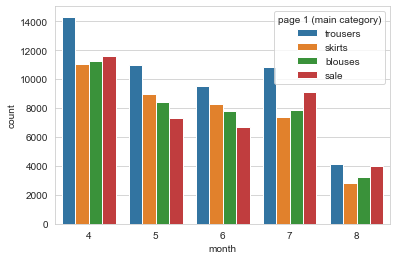

In [68]:
sb.countplot(x = 'month', hue = 'page 1 (main category)', data = df)

In [66]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,Poland,1,trousers,A13,beige,bottom in the middle,en face,28,2,1
1,2008,4,1,2,Poland,1,trousers,A16,beige,bottom right,en face,33,2,1
2,2008,4,1,3,Poland,1,skirts,B4,olive,top in the middle,en face,52,1,1
3,2008,4,1,4,Poland,1,skirts,B17,gray,bottom right,profile,38,2,1
4,2008,4,1,5,Poland,1,skirts,B8,brown,top right,profile,52,1,1
